In [1]:
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline
import seaborn as sb
sb.set()
df = pd.read_csv("titanic_prepared_data.csv")
df.head()

,Survived,Sex,Age,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,0,1,22.0,0,0,1,0,0,1,2
1,1,0,38.0,1,0,0,1,0,0,2
2,1,0,26.0,0,0,1,0,0,1,1
3,1,0,35.0,1,0,0,0,0,1,2
4,0,1,35.0,0,0,1,0,0,1,1


In [2]:
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0:1].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print "X_train :: " + str(X_train.shape) + "\tX_test :: " + str(X_test.shape)
print "Y_train :: " + str(Y_train.shape) + "\tY_test :: " + str(Y_test.shape)

X_train :: (623L, 9L)	X_test :: (268L, 9L)
Y_train :: (623L, 1L)	Y_test :: (268L, 1L)


In [4]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C=0.08)

In [5]:
lg.fit(X_train, Y_train.ravel())

LogisticRegression(C=0.08, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
Y_pred = lg.predict(X_test)
print "Y_predict :: " + str(Y_pred.shape) + "\n" + str(Y_pred)

Y_predict :: (268L,)
[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0]


In [7]:
from sklearn.metrics import accuracy_score
acc_lg = round(accuracy_score(Y_pred, Y_test)*100, 2)
print "Accuracy of Logistic Regression :: " + str(acc_lg) + "%"

Accuracy of Logistic Regression :: 82.09%


import numpy as np
features = np.array([[1, 21, 1, 0, 0, 1, 0, 0, 3]])
print "1 for Survived\n0 for Unsurvived" + "Prediction :: " str(lg.predict(features))

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [9]:
knn.fit(X_train, Y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
Y_pred = knn.predict(X_test)
print "Y_predict :: " + str(Y_pred.shape) + "\n" + str(Y_pred)

Y_predict :: (268L,)
[0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 1 1 0]


In [11]:
from sklearn.metrics import accuracy_score
acc_knn = round(accuracy_score(Y_pred, Y_test)*100, 2)
print "Accuracy of K-NN :: " + str(acc_knn) + "%"

Accuracy of K-NN :: 77.24%


In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [13]:
gnb.fit(X_train, Y_train.ravel())

GaussianNB(priors=None)

In [14]:
Y_pred = gnb.predict(X_test)
print "Y_predict :: " + str(Y_pred.shape) + "\n" + str(Y_pred)

Y_predict :: (268L,)
[0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0
 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1
 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 1 0 0 1 1]


In [15]:
from sklearn.metrics import accuracy_score
acc_gnb = round(accuracy_score(Y_pred, Y_test)*100, 2)
print "Accuracy of Gaussian Naive Bayes :: " + str(acc_gnb) + "%"

Accuracy of Gaussian Naive Bayes :: 76.49%


In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [17]:
dt.fit(X_train, Y_train.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
Y_pred = dt.predict(X_test)
print "Y_predict :: " + str(Y_pred.shape) + "\n" + str(Y_pred)

Y_predict :: (268L,)
[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0
 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0
 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 0]


In [19]:
from sklearn.metrics import accuracy_score
acc_dt = round(accuracy_score(Y_pred, Y_test)*100, 2)
print "Accuracy of Decision Tree :: " + str(acc_dt) + "%"

Accuracy of Decision Tree :: 76.87%


In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

In [21]:
rf.fit(X_train, Y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
Y_pred = rf.predict(X_test)
print "Y_predict :: " + str(Y_pred.shape) + "\n" + str(Y_pred)

Y_predict :: (268L,)
[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0
 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0
 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 0]


In [23]:
from sklearn.metrics import accuracy_score
acc_rf = round(accuracy_score(Y_pred, Y_test)*100, 2)
print "Accuracy of Random Forest :: " + str(acc_rf) + "%"

Accuracy of Random Forest :: 77.24%


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [25]:
knn.fit(X_train, Y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [27]:
import numpy as np
features = np.array([[1, 21, 1, 0, 0, 1, 0, 0, 3]])
print "1 for Survived\n0 for Unsurvived"

1 for Survived
0 for Unsurvived


In [28]:
Y_pred = knn.predict(features)
print "Y_predict :: " + str(Y_pred.shape) + "\n" + str(Y_pred)

Y_predict :: (1L,)
[1]


In [29]:
models = pd.DataFrame({
    'Model' : ['Logistic', 'K-NN', 'GNB', 'Decision', 'Random'],
    'Accuracy' : [acc_lg, acc_knn, acc_gnb, acc_dt, acc_rf]
})

In [30]:
models.head()

,Accuracy,Model
0,82.09,Logistic
1,77.24,K-NN
2,76.49,GNB
3,76.87,Decision
4,77.24,Random


In [31]:
models.sort_values(by='Accuracy', ascending=False)

,Accuracy,Model
0,82.09,Logistic
1,77.24,K-NN
4,77.24,Random
3,76.87,Decision
2,76.49,GNB


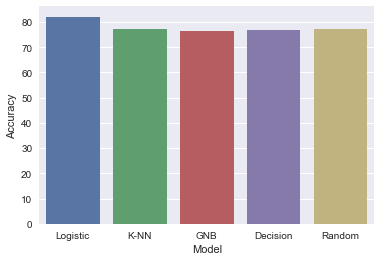

In [32]:
sb.barplot(x='Model', y='Accuracy', data=models)